In [98]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

from scipy.optimize import curve_fit

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass


Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/grid_attributes.pkl instead of computing


# Retrieve storms object


In [6]:
jd = joint_distrib.JointDistribution(gr, nd=5, storm_tracking=True, verbose=True)

Distribs loaded
Overwrite set to false so loading basics attributes from .npy
Loading storms...
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz
Retrieve labels in jdist


# Check density and storm_tracking

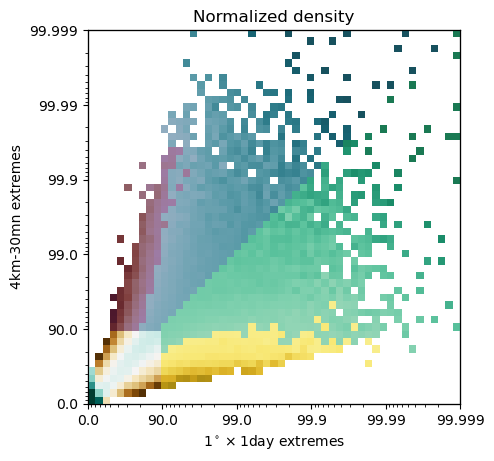

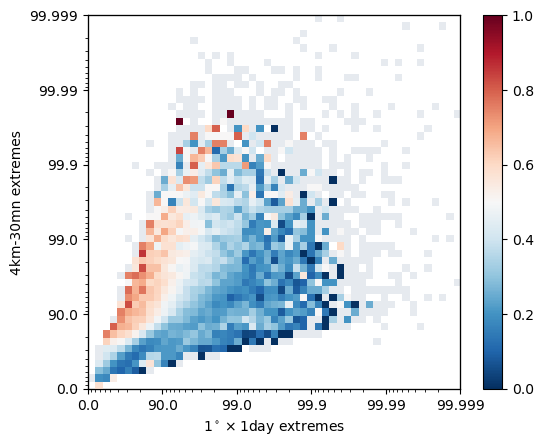

In [7]:
%matplotlib inline
jd.plot(branch=False)

data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

# Dev plane fit to extreme rains

True


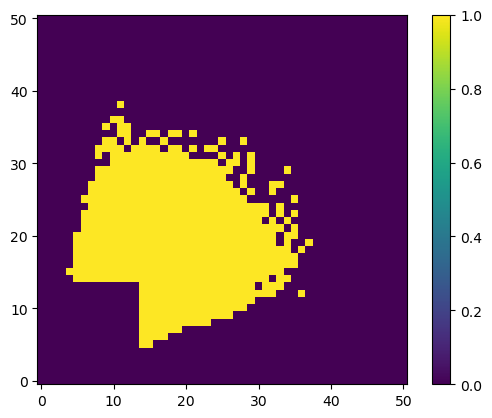

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.ma import masked_array

# Example 2D array with np.nan values
array_2d, noise = jd.get_mcs_bin_fraction()
array_2d = 100*array_2d
mask_jdist_below_treshold = np.outer(jd.dist1.ranks < 95, jd.dist2.ranks < 95)
mask_treshold_for_plane_fit = np.logical_and(~mask_jdist_below_treshold, ~np.isnan(array_2d))
plt.imshow(mask_treshold_for_plane_fit, origin = 'lower')
plt.colorbar()
print(True==1)
plt.show()

# Create masked array for y
# y = masked_array(array_2d.flatten(), mask=mask_treshold_for_plane_fit.flatten())
y = array_2d[mask_treshold_for_plane_fit]

xx, yy = np.meshgrid(np.arange(array_2d.shape[0]), np.arange(array_2d.shape[1]))

# xx = masked_array(xx.flatten(), mask=mask_treshold_for_plane_fit.flatten())
# yy = masked_array(yy.flatten(), mask=mask_treshold_for_plane_fit.flatten())

X = np.column_stack((xx[mask_treshold_for_plane_fit], yy[mask_treshold_for_plane_fit]))
# X = masked_array(X, mask=mask_treshold_for_plane_fit.flatten())

model = LinearRegression().fit(X, y)

# Equation is a*bin_i+b*bin_j+c = y
model_plane = model.predict(X)


In [58]:
y_pred = np.full_like(array_2d, np.nan)
y_pred[mask_treshold_for_plane_fit] = model_plane

/scratchx/mcarenso/ipykernel_1227037/2234860476.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  cx = plt.figure(figsize=(12,6)).gca(projection='3d')


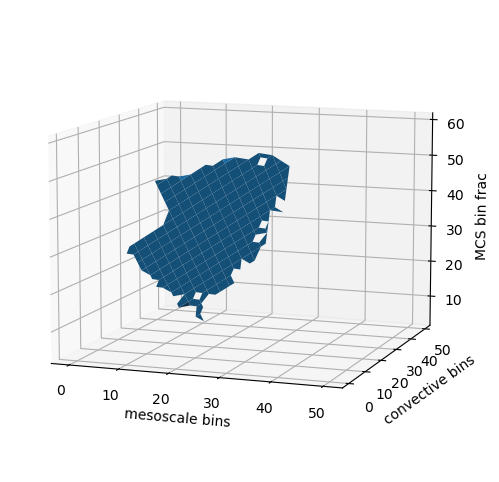

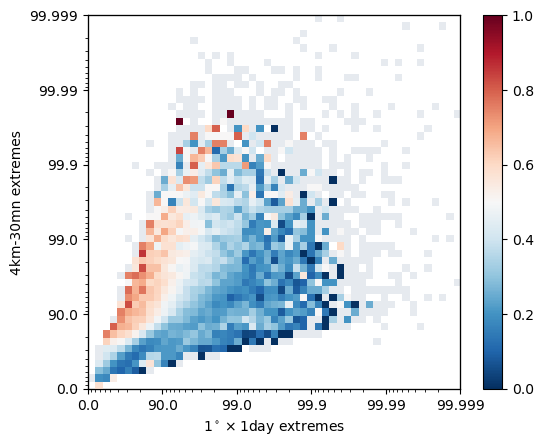

In [82]:
%matplotlib inline
cx = plt.figure(figsize=(12,6)).gca(projection='3d')

# cx.scatter(xx[mask_treshold_for_plane_fit], yy[mask_treshold_for_plane_fit], y, color = 'green')
cx.plot_surface(xx, yy, y_pred, alpha = 1)
cx.set(xlabel = 'mesoscale bins', ylabel='convective bins', zlabel = 'MCS bin frac')
cx.view_init(elev=10, azim=290)

data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)

In [52]:
model.intercept_
model.coef_

array([ 0.00922584, -0.01337559])

# Average data over ranks from one of the distribs

In [92]:
file = os.path.join(jd.jd_path, 'storms_growth_rates.npy')
storms_growth_rates = np.load(file)
for storm, growth_rate in zip(jd.storms, storms_growth_rates):
    setattr(storm, 'growth_rate', growth_rate)

In [95]:
# should be saved
mean_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['mean'])[0][0,0,:,:]
max_growth_rate = jd.storm_attributes_on_jdist(['growth_rate'], ['max'])[0][0,0,:,:]


0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495001234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950

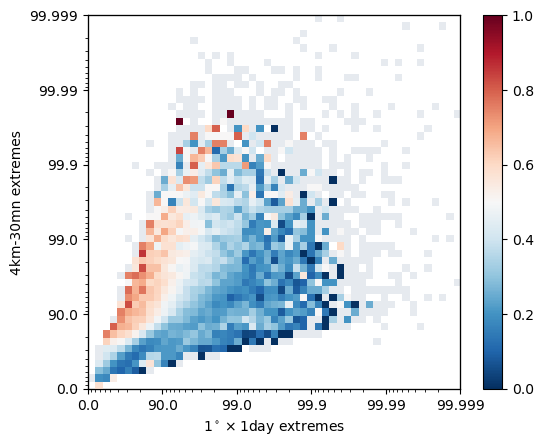

In [133]:
# data = mean_growth_rate
# jd.plot_data(data, noise, cmap = plt.cm.viridis, branch=False, label = 'Growth rate (km2/min)')
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)


/scratchx/mcarenso/ipykernel_1227037/1906427966.py:10: RuntimeWarning: Mean of empty slice
  data_mean_subset = np.nanmean(data[np.logical_and(rank_low<=jd.dist1.ranks, jd.dist1.ranks<=rank_high), :], axis = axis)
/scratchx/mcarenso/ipykernel_1227037/1906427966.py:10: RuntimeWarning: Mean of empty slice
  data_mean_subset = np.nanmean(data[np.logical_and(rank_low<=jd.dist1.ranks, jd.dist1.ranks<=rank_high), :], axis = axis)
/scratchx/mcarenso/ipykernel_1227037/1906427966.py:10: RuntimeWarning: Mean of empty slice
  data_mean_subset = np.nanmean(data[np.logical_and(rank_low<=jd.dist1.ranks, jd.dist1.ranks<=rank_high), :], axis = axis)


Text(0.5, 1.0, 'Axis 0')

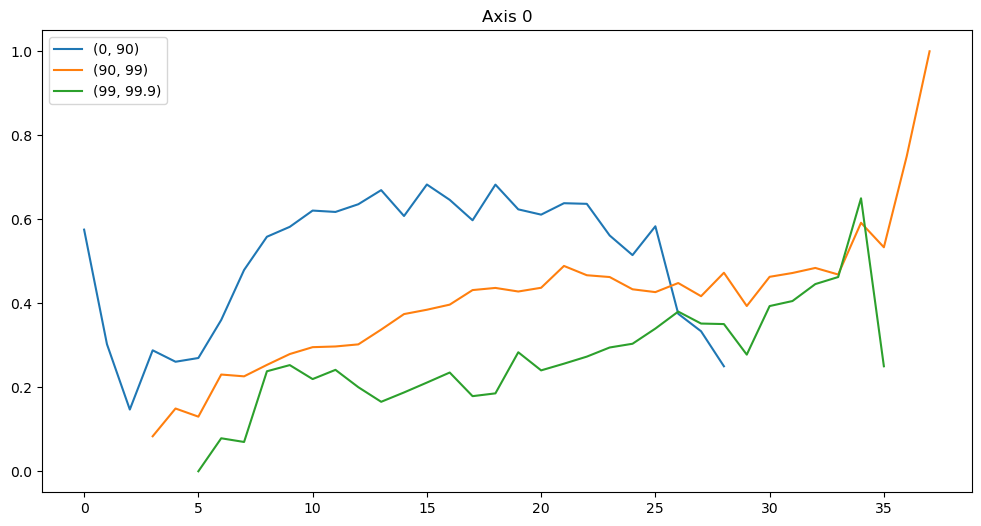

In [137]:
ranks = [0, 90, 99, 99.9] #, 99.99, 99.999]
tuple_ranks = [(ranks[i], ranks[i+1]) for i in range(len(ranks)-1)]
axis = 0
data = data.T

fig, ax = plt.subplots(figsize = (12, 6))
for i, tuple_rank in enumerate(tuple_ranks):
    rank_low, rank_high = tuple_rank
    if axis == 0 : 
        data_mean_subset = np.nanmean(data[np.logical_and(rank_low<=jd.dist1.ranks, jd.dist1.ranks<=rank_high), :], axis = axis)
    elif axis == 1 : 
        data_mean_subset = np.nanmean(data[:, np.logical_and(rank_low<=jd.dist2.ranks, jd.dist2.ranks<=rank_high)], axis = axis)

    ax.plot(data_mean_subset, label = tuple_rank)
plt.legend()
plt.title(f"Axis {axis}")